In [160]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# AIM: FORECAST BIKE RENTAL DEMAND DURING EACH HOUR

In [161]:
# import training and testing dataset
bike_train = pd.read_csv('train.csv')

bike_test = pd.read_csv('test.csv')

In [162]:
# label training and testing dataset
bike_train['source'] = 'train'

bike_test['source'] = 'test'

print(bike_train.shape, bike_test.shape)

(10886, 13) (6493, 10)


In [163]:
# combine training and testing dataset
data = pd.concat([bike_train, bike_test], ignore_index=True, sort=False)

data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,source
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3.0,13.0,16.0,train
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8.0,32.0,40.0,train
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5.0,27.0,32.0,train
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3.0,10.0,13.0,train
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0.0,1.0,1.0,train


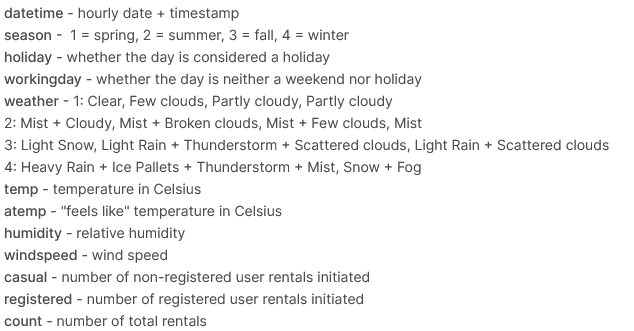

In [164]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    17379 non-null  object 
 1   season      17379 non-null  int64  
 2   holiday     17379 non-null  int64  
 3   workingday  17379 non-null  int64  
 4   weather     17379 non-null  int64  
 5   temp        17379 non-null  float64
 6   atemp       17379 non-null  float64
 7   humidity    17379 non-null  int64  
 8   windspeed   17379 non-null  float64
 9   casual      10886 non-null  float64
 10  registered  10886 non-null  float64
 11  count       10886 non-null  float64
 12  source      17379 non-null  object 
dtypes: float64(6), int64(5), object(2)
memory usage: 1.7+ MB


In [165]:
# data types
data.dtypes.value_counts()

float64    6
int64      5
object     2
dtype: int64

- besides **source** and **datetime** which can be converted to a numerical datetime format, the rest of the features are all numerical values

In [166]:
data.describe()[['temp','atemp','humidity','windspeed','casual','registered']]

,temp,atemp,humidity,windspeed,casual,registered
count,17379.000000,17379.000000,17379.000000,17379.000000,10886.000000,10886.000000
mean,20.376474,23.788755,62.722884,12.736540,36.021955,155.552177
std,7.894801,8.592511,19.292983,8.196795,49.960477,151.039033
min,0.820000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.940000,16.665000,48.000000,7.001500,4.000000,36.000000
50%,20.500000,24.240000,63.000000,12.998000,17.000000,118.000000
75%,27.060000,31.060000,78.000000,16.997900,49.000000,222.000000
max,41.000000,50.000000,100.000000,56.996900,367.000000,886.000000


datetime       0.000000
season         0.000000
holiday        0.000000
workingday     0.000000
weather        0.000000
temp           0.000000
atemp          0.000000
humidity       0.000000
windspeed      0.000000
casual        37.361183
registered    37.361183
count         37.361183
source         0.000000
dtype: float64

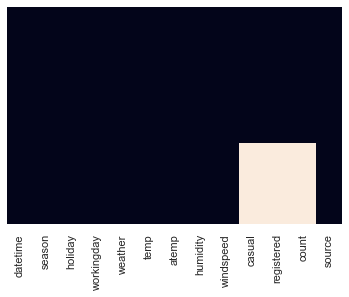

In [167]:
# missing values
sns.heatmap(data.isnull(), cbar=False, yticklabels=False)

data.isnull().sum()/len(data)*100

- no missing data in the training set

## EDA

In [168]:
sns.set_theme(style="whitegrid")

### Univariate Analysis

In [169]:
# unique values
data.apply(lambda x: x.unique())

datetime      [2011-01-01 00:00:00, 2011-01-01 01:00:00, 201...
season                                             [1, 2, 3, 4]
holiday                                                  [0, 1]
workingday                                               [0, 1]
weather                                            [1, 2, 3, 4]
temp          [9.84, 9.02, 8.2, 13.12, 15.58, 14.76, 17.22, ...
atemp         [14.395, 13.635, 12.88, 17.425, 19.695, 16.665...
humidity      [81, 80, 75, 86, 76, 77, 72, 82, 88, 87, 94, 1...
windspeed     [0.0, 6.0032, 16.9979, 19.0012, 19.9995, 12.99...
casual        [3.0, 8.0, 5.0, 0.0, 2.0, 1.0, 12.0, 26.0, 29....
registered    [13.0, 32.0, 27.0, 10.0, 1.0, 0.0, 2.0, 7.0, 6...
count         [16.0, 40.0, 32.0, 13.0, 1.0, 2.0, 3.0, 8.0, 1...
source                                            [train, test]
dtype: object

- because most of the features are numerical values, there are no distinct unique values besides labels used for **season**, **holiday**, **workingday** and **weather**.

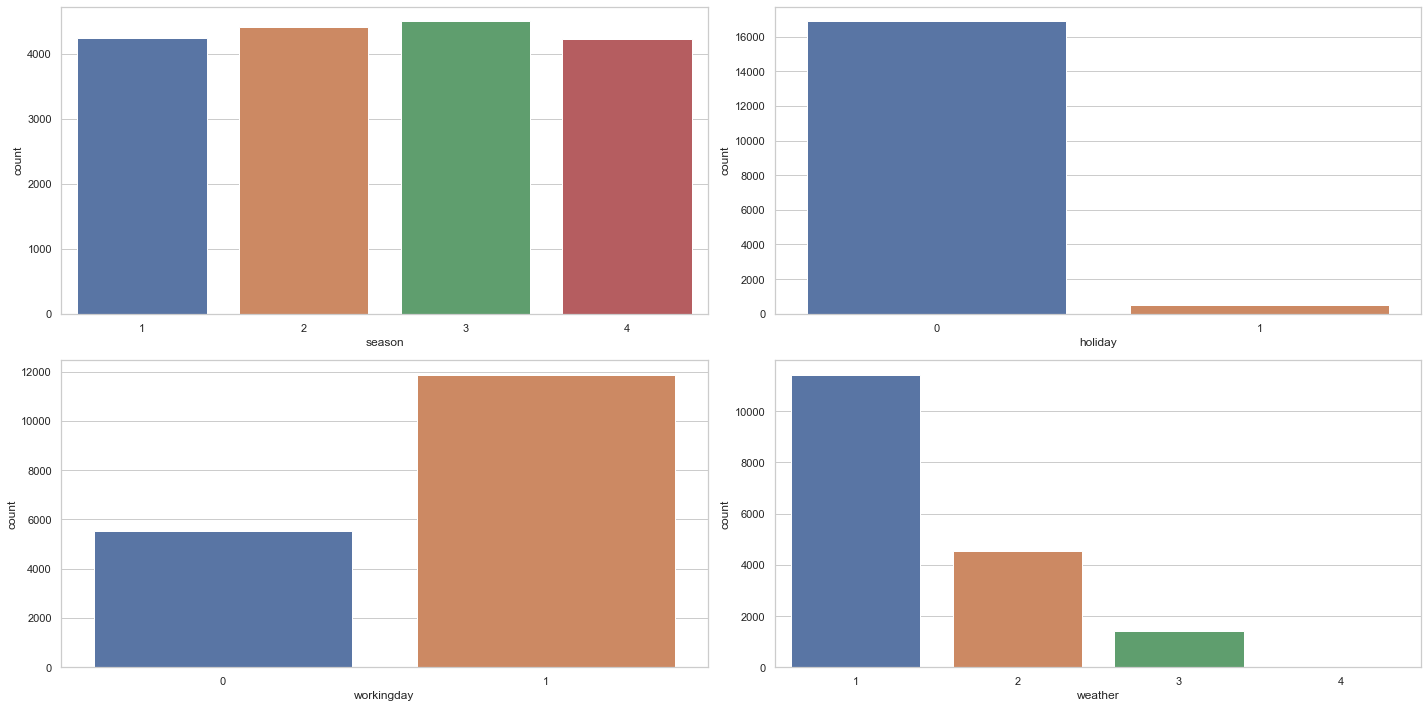

In [170]:
fig, axes = plt.subplots(2,2, figsize=(20,10))

sns.countplot(x='season', data=data, ax=axes[0,0])

sns.countplot(x='holiday', data=data, ax=axes[0,1])

sns.countplot(x='workingday', data=data, ax=axes[1,0])

sns.countplot(x='weather', data=data, ax=axes[1,1])

plt.tight_layout()

- most rentels seem to be on fall season followed by summer, spring and winter.
- most rentels seem to be done during non-holiday periods, this can be further proven by the number of bikes rented on working days is more than those not.
- most rentels seem to lso rented when the weather is clear with the least during heavy snow and rain periods.

Text(0.5, 1.0, 'Total Rentals from Registered and Casual Users')

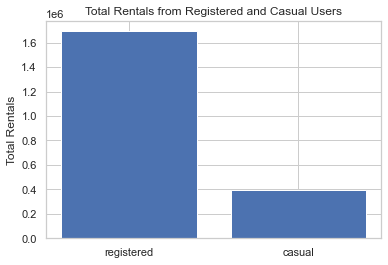

In [171]:
plt.bar(['registered','casual'], 
        [data['registered'].sum(), data['casual'].sum()])
plt.ylabel('Total Rentals')
plt.title('Total Rentals from Registered and Casual Users')

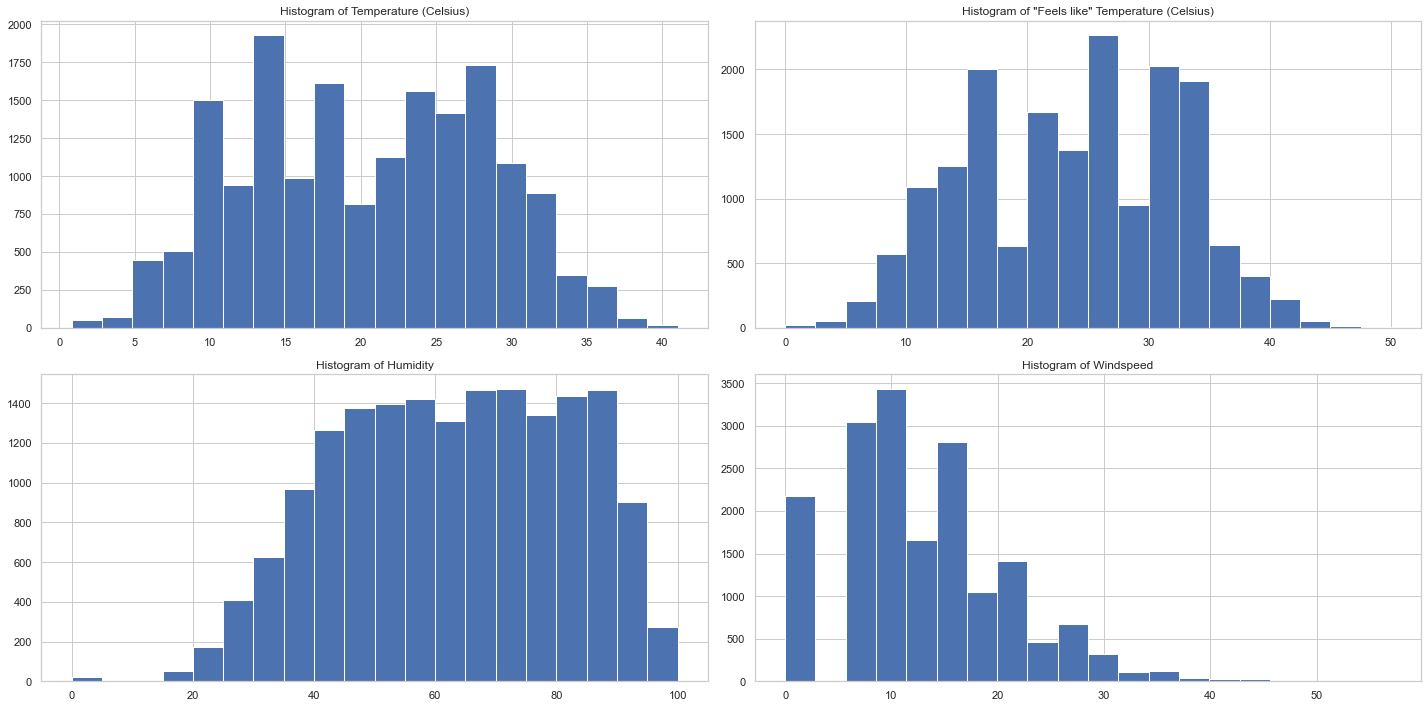

In [172]:
fig, axes = plt.subplots(2,2, figsize=(20,10))

data['temp'].hist(bins=20, ax=axes[0,0])
axes[0,0].set_title('Histogram of Temperature (Celsius)')

data['atemp'].hist(bins=20, ax=axes[0,1])
axes[0,1].set_title('Histogram of "Feels like" Temperature (Celsius)')

data['humidity'].hist(bins=20, ax=axes[1,0])
axes[1,0].set_title('Histogram of Humidity')

data['windspeed'].hist(bins=20, ax=axes[1,1])
axes[1,1].set_title('Histogram of Windspeed')

plt.tight_layout()

- both temperature histograms are slightly similar with each other and follow a almost normal distribution shape.
- humidity have an average range around 40 to 90 with an outlier somewhere around below 10.
- all histograms looks natural distributed.

Text(0.5, 1.0, 'Boxplot of Users')

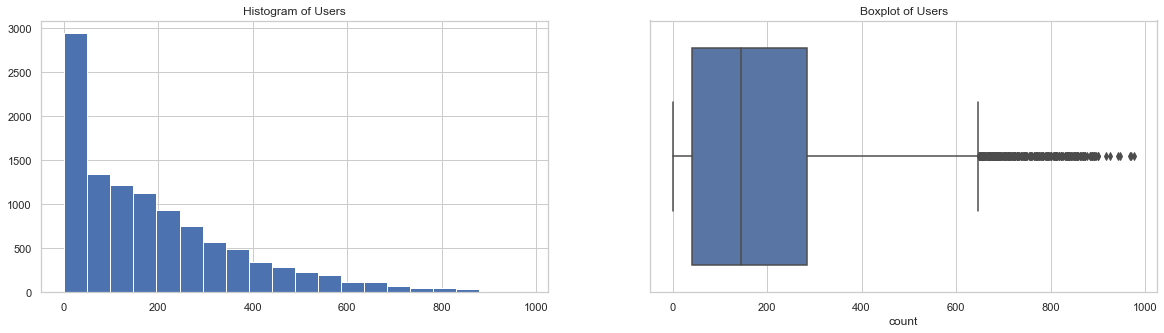

In [173]:
fig, axes = plt.subplots(1,2, figsize=(20,5))

data['count'].hist(bins=20, ax=axes[0])
axes[0].set_title('Histogram of Users')

sns.boxplot(x='count', data=data, ax=axes[1])
axes[1].set_title('Boxplot of Users')

- there are outliers on the target variable.
- the histogram is skewed to the right, we want to try and make the distribution as normal as possible.
- removing the outliers and take the log might be a solution before modeling the data.

Text(0.5, 1.0, 'Histogram of Registered Users')

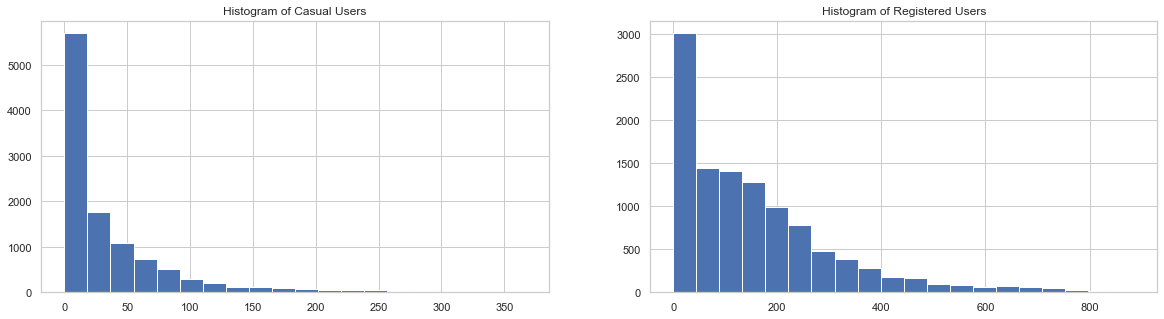

In [174]:
fig, axes = plt.subplots(1,2, figsize=(20,5))

data['casual'].hist(bins=20, ax=axes[0])
axes[0].set_title('Histogram of Casual Users')

data['registered'].hist(bins=20, ax=axes[1])
axes[1].set_title('Histogram of Registered Users')

- an average casual user per day is around 30 users.
- an average registered user per day is arond 150 users.
- both follow a natural distribution.

### Bi-variate Analysis
#### Numerical Relationship

<AxesSubplot:>

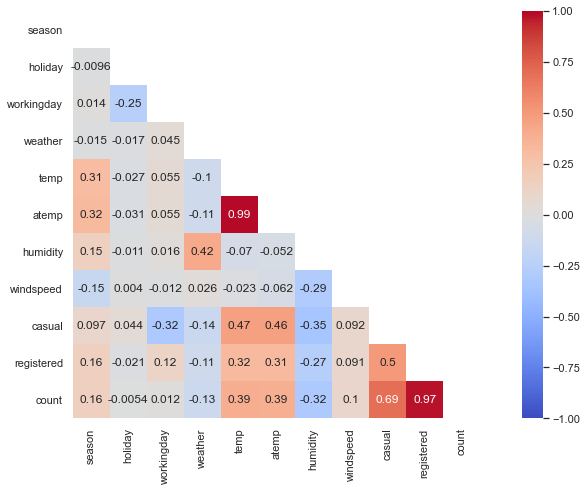

In [175]:
# correlation with each other
mask = np.triu(np.ones_like(data.corr(), dtype=bool))

plt.figure(figsize=(15,7.5))
sns.heatmap(data.corr(), mask=mask, annot=True,
            square=True, cmap='coolwarm', vmin=-1, vmax=1)

- **temp** and **atemp** are highly correlated with each other, which is true due to **atemp** is just the "feels like" temperature.
- there is also a high correlation between **registered** users and the number of bikes rented.
- **weather** and **humidity** seems to have a positive correlation with each other too.
- **casual** users seems to have a high positive correlation with both the temperature features compared to **registered** users.
- **workingday** has a negative correlation with **casual** users, as this can be further proven by the bar chart above, where most users rent their bikes on working days means that they are mostly frequent (registered) users. 

<AxesSubplot:>

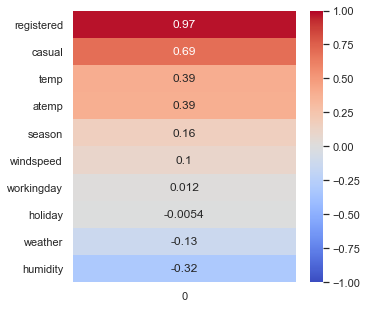

In [176]:
# correlation with target
correlation = data.corrwith(data['count']).iloc[:-1].to_frame()

sort_correlation = correlation.sort_values(0, ascending=False)[0]

fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(sort_correlation.to_frame(), cmap='coolwarm', annot=True, ax=ax, vmin=-1, vmax=1)

- **registered** and **casual** users together with both temperature features have a high positive correlation with the target variable.
- **humidity** have a high negative correlation with the target.

<AxesSubplot:xlabel='count', ylabel='atemp'>

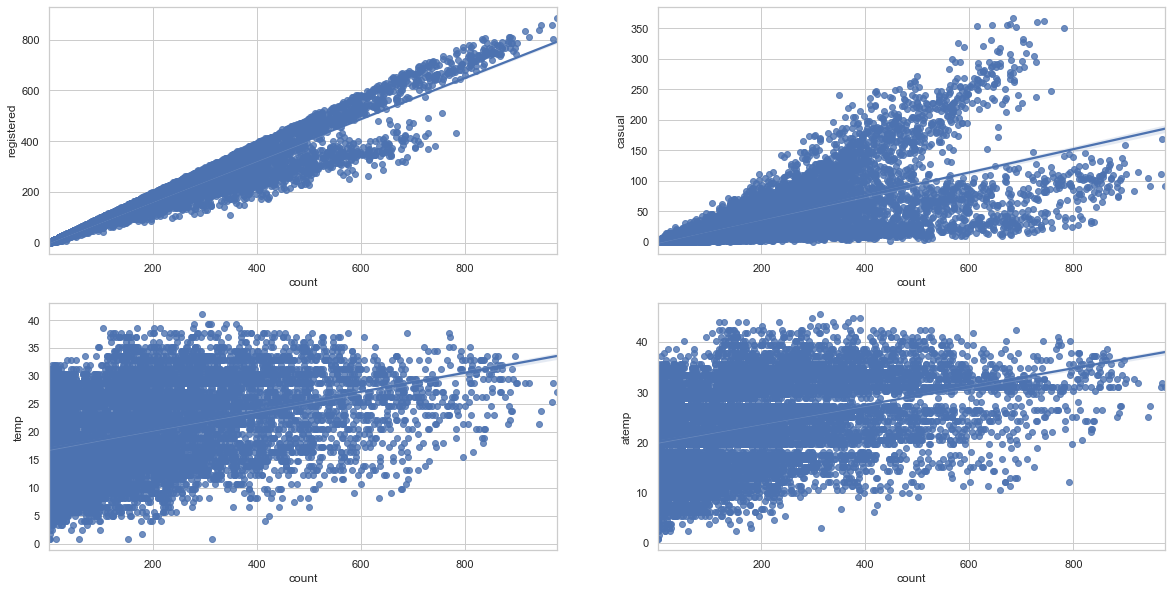

In [177]:
fig, axes = plt.subplots(2,2, figsize=(20,10))

sns.regplot(x='count', y='registered', data=data, ax=axes[0,0])

sns.regplot(x='count', y='casual', data=data, ax=axes[0,1])

sns.regplot(x='count', y='temp', data=data, ax=axes[1,0])

sns.regplot(x='count', y='atemp', data=data, ax=axes[1,1])

<AxesSubplot:xlabel='count', ylabel='humidity'>

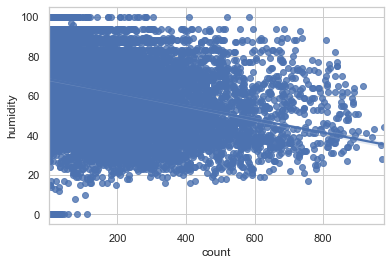

In [178]:
sns.regplot(x='count', y='humidity', data=data)

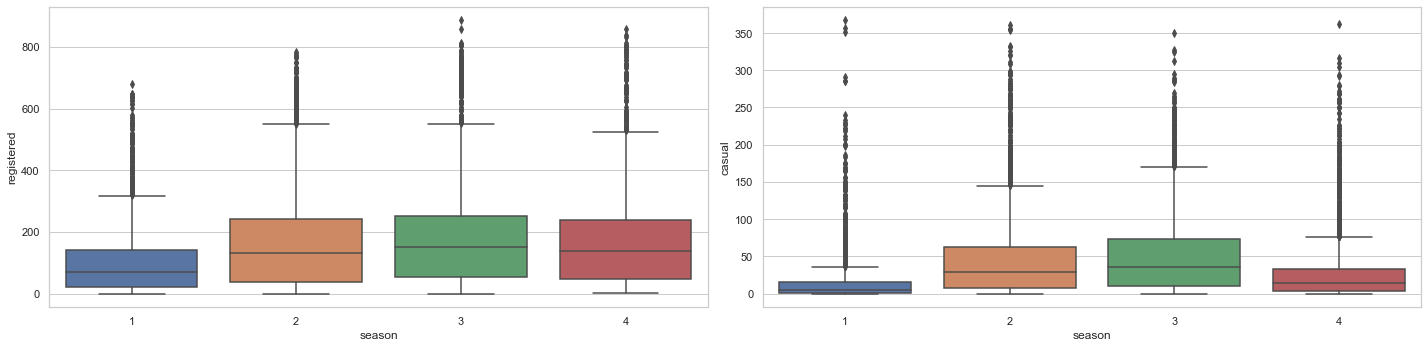

In [179]:
fig, axes = plt.subplots(1,2, figsize=(20,5))

sns.boxplot(x='season', y='registered', data=data, ax=axes[0])

sns.boxplot(x='season', y='casual', data=data, ax=axes[1])

plt.tight_layout()

- **SEASON**: **casual** users rent less during spring and winter.

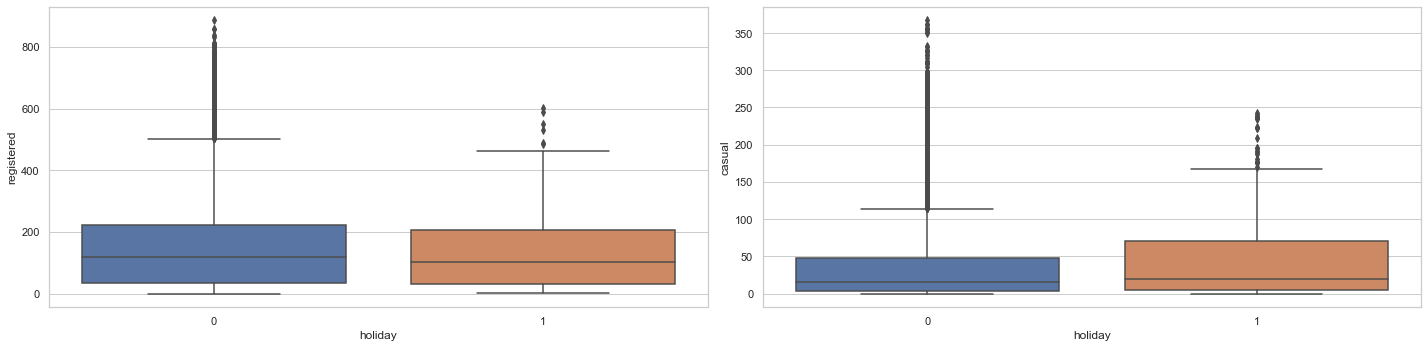

In [180]:
fig, axes = plt.subplots(1,2, figsize=(20,5))

sns.boxplot(x='holiday', y='registered', data=data, ax=axes[0])

sns.boxplot(x='holiday', y='casual', data=data, ax=axes[1])

plt.tight_layout()

- **HOLIDAY**: **casual** users rent more during the holidays.

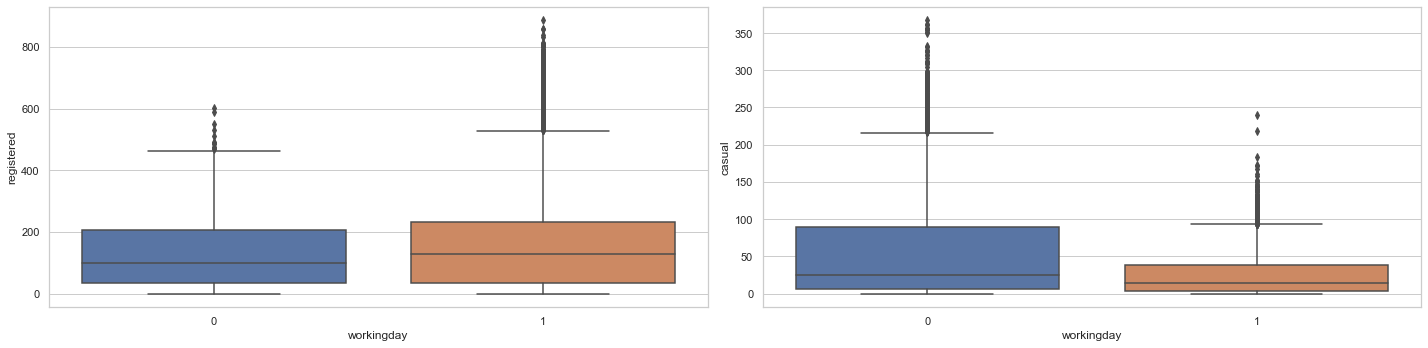

In [181]:
fig, axes = plt.subplots(1,2, figsize=(20,5))

sns.boxplot(x='workingday', y='registered', data=data, ax=axes[0])

sns.boxplot(x='workingday', y='casual', data=data, ax=axes[1])

plt.tight_layout()

- **WORKINGDAY**: **casual** users rent less during working days

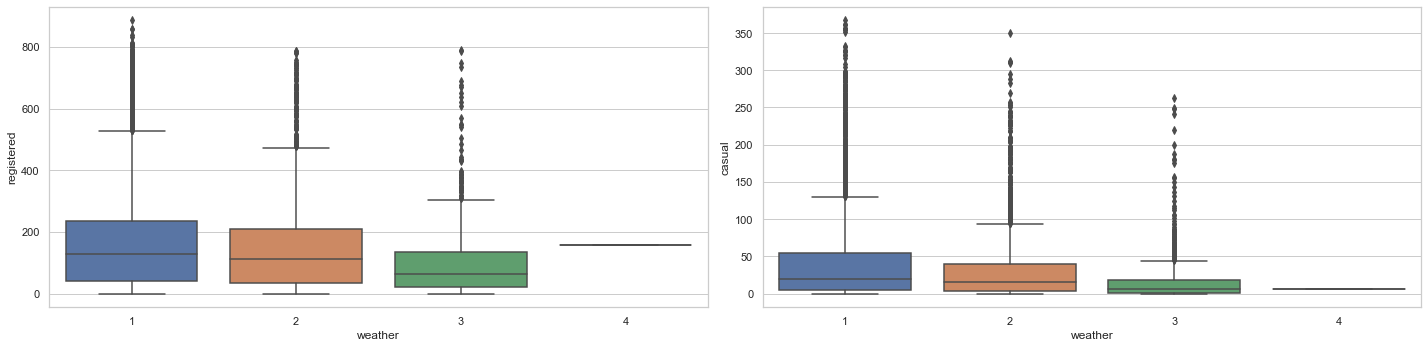

In [182]:
fig, axes = plt.subplots(1,2, figsize=(20,5))

sns.boxplot(x='weather', y='registered', data=data, ax=axes[0])

sns.boxplot(x='weather', y='casual', data=data, ax=axes[1])

plt.tight_layout()

- **WEATHER**: **registered** users tend to rent even during heavy rain compared to **casual** users.

## Feature Engineering

In [183]:
# convert datetime to datetime format
data['datetime'] = pd.to_datetime(data['datetime'])

In [184]:
# extract year, month, day, hour
data['year'] = data['datetime'].apply(lambda x: x.year)

data['month'] = data['datetime'].apply(lambda x: x.month)

data['day'] = data['datetime'].apply(lambda x: x.dayofweek)

data['hour'] = data['datetime'].apply(lambda x: x.hour)

<AxesSubplot:>

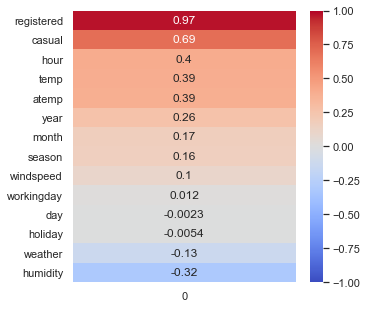

In [185]:
# correlation with target with new features
correlation = data.corrwith(data['count']).drop('count').to_frame()

sort_correlation = correlation.sort_values(0, ascending=False)[0]

fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(sort_correlation.to_frame(), cmap='coolwarm', annot=True, ax=ax, vmin=-1, vmax=1)

- **hour** have a positive correlation with the number of bikes rented.

In [186]:
# label days
days = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

data['day'] = data['day'].map(days)

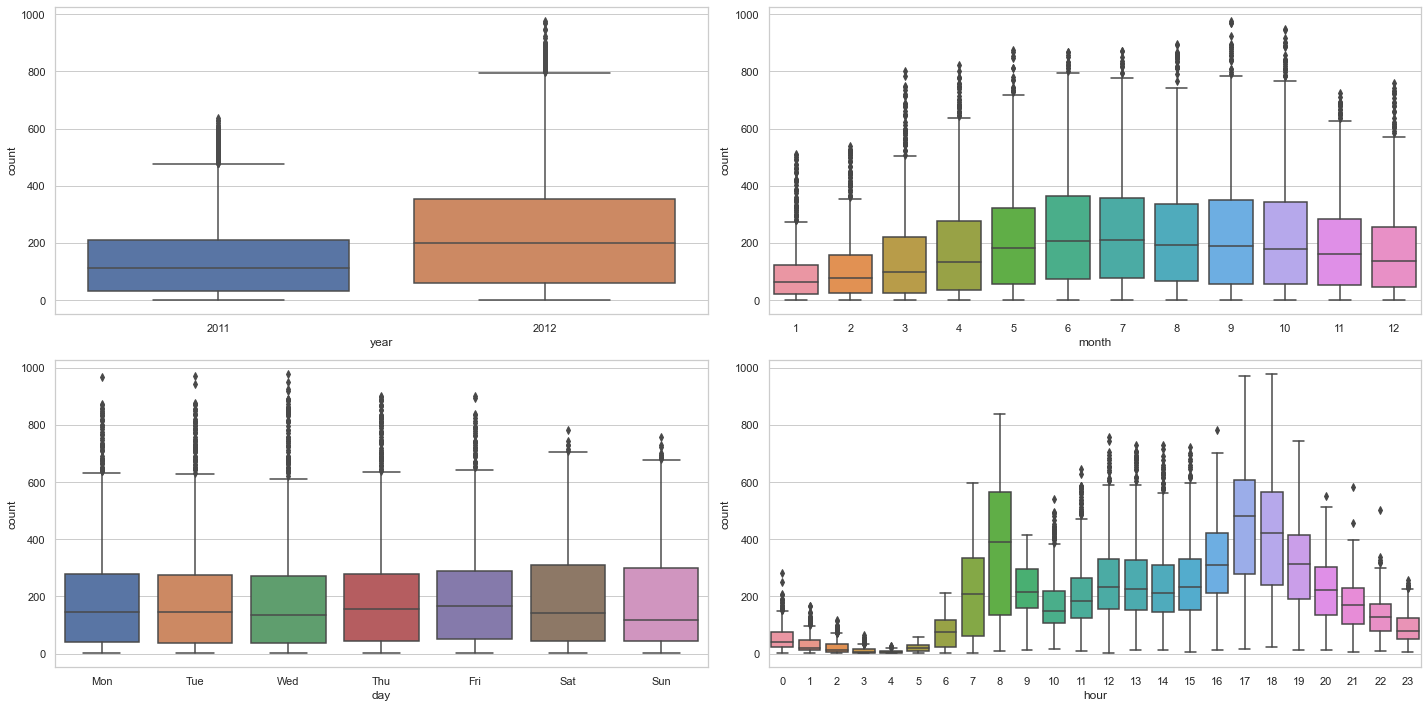

In [187]:
fig, axes = plt.subplots(2,2, figsize=(20,10))

sns.boxplot(x='year', y='count', data=data, ax=axes[0,0])

sns.boxplot(x='month', y='count', data=data, ax=axes[0,1])

sns.boxplot(x='day', y='count', data=data, order=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'], ax=axes[1,0])

sns.boxplot(x='hour', y='count', data=data, ax=axes[1,1])

plt.tight_layout()

- more bikes are rented during 2012 compared to 2011.
- the trend of the **month** are similar to the trend of **season**.
- total bikes are rented almost similar during **day** except Saturdays and Sundays, which also gives us the same relationship as the **workingday** feature.
- there is two peak in **hour** for renting of bikes, one at 8am, the other at 5pm to 6pm.

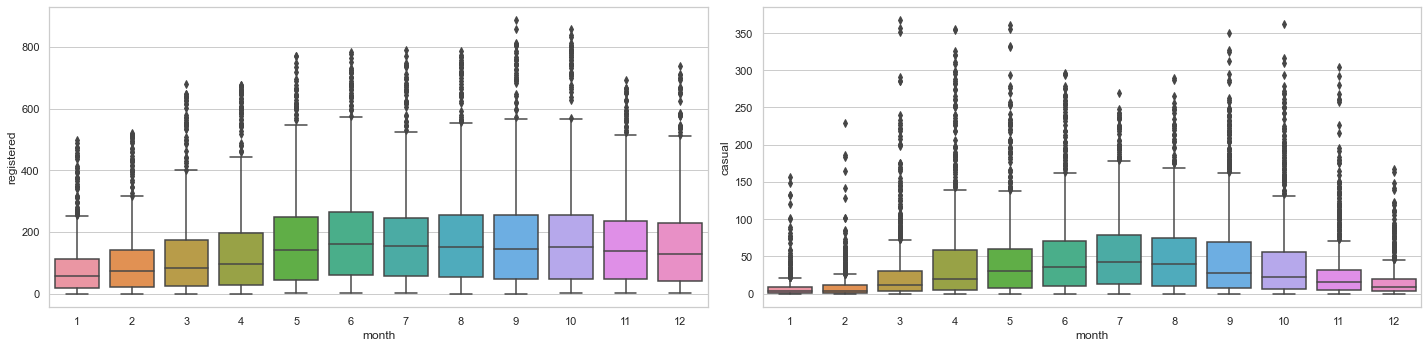

In [188]:
fig, axes = plt.subplots(1,2, figsize=(20,5))

sns.boxplot(x='month', y='registered', data=data, ax=axes[0])

sns.boxplot(x='month', y='casual', data=data, ax=axes[1])

plt.tight_layout()

- **MONTH**: **casual** users rented relatively less during the 1st quarter of the year and last quarter of the year.
- this also shows a similar trend to **season** feature.

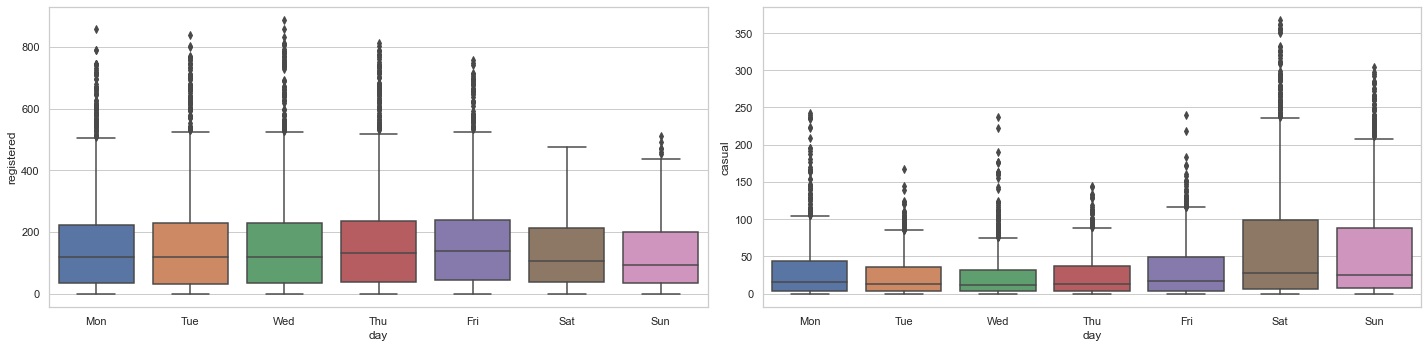

In [189]:
fig, axes = plt.subplots(1,2, figsize=(20,5))

sns.boxplot(x='day', y='registered', data=data ,order=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'], ax=axes[0])

sns.boxplot(x='day', y='casual', data=data ,order=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'], ax=axes[1])

plt.tight_layout()

- **DAY**: **casual** users rented more during the weekends.
- this also follows a similar trend to **workingday** feature.

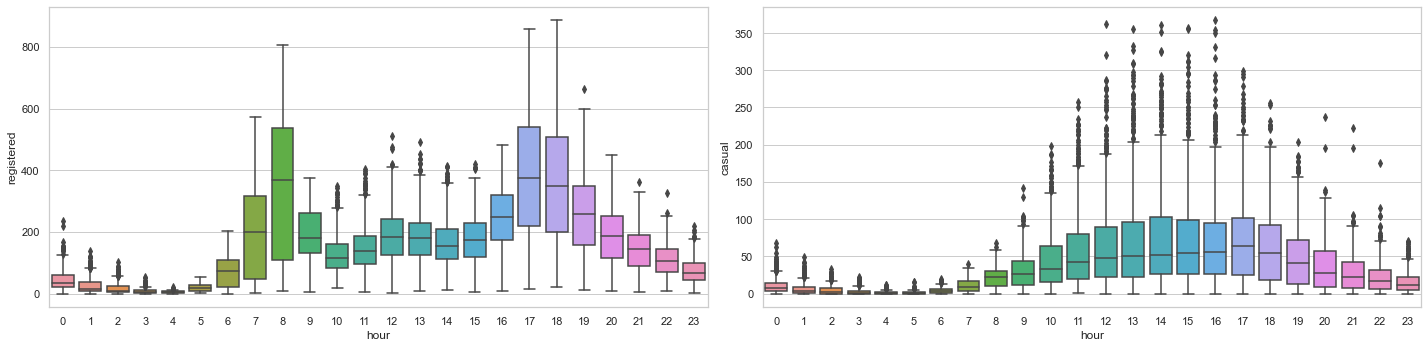

In [190]:
fig, axes = plt.subplots(1,2, figsize=(20,5))

sns.boxplot(x='hour', y='registered', data=data, ax=axes[0])

sns.boxplot(x='hour', y='casual', data=data, ax=axes[1])

plt.tight_layout()

- **HOUR**: **casual** users do not have peak hours as compared to **registered** users, however they do follow a trend during 9am to 8pm.

In [191]:
# function that groups days into weekday, weekend and holiday
def day_type(cols):
    holiday = cols[0]
    day = cols[1]
    
    if holiday == 0:
        if (day == 'Sat') or (day == 'Sun'):
            return 'weekend'
        else:
            return 'weekday'
    else:
        return 'holiday'

In [192]:
# new feature
data['daytype'] = data[['holiday','day']].apply(day_type, axis=1)

<AxesSubplot:xlabel='daytype', ylabel='count'>

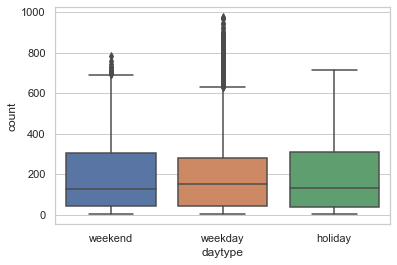

In [193]:
sns.boxplot(x='daytype', y='count', data=data)

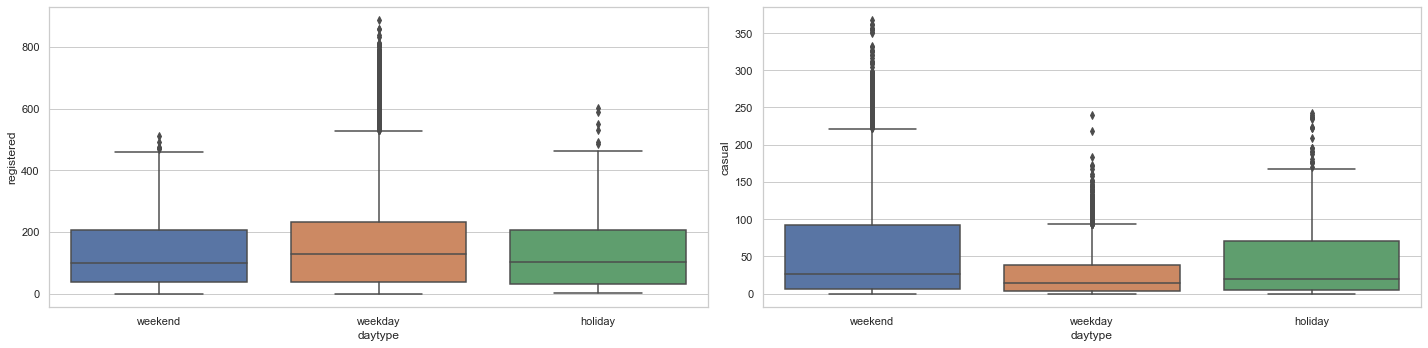

In [194]:
fig, axes = plt.subplots(1,2, figsize=(20,5))

sns.boxplot(x='daytype', y='registered', data=data, ax=axes[0])

sns.boxplot(x='daytype', y='casual', data=data, ax=axes[1])

plt.tight_layout()

- **DAYOFWEEK**: **casual** users rent less during the weekdays 

In [195]:
# function that group hour to midnight, morning, afternoon and night
def hour_type(cols):
    if cols in range(6):
        return 'midnight'
    
    elif cols in range(6,12):
        return 'morning'
    
    elif cols in range(12,18):
        return 'afternoon'
    
    else:
        return 'night'

In [196]:
# new feature
data['hourtype'] = data['hour'].apply(hour_type)

<AxesSubplot:xlabel='hourtype', ylabel='count'>

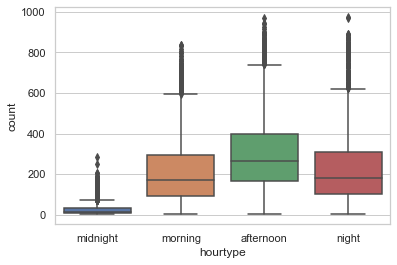

In [197]:
sns.boxplot(x='hourtype', y='count', data=data)

- most bikes are rented during the afternoon.

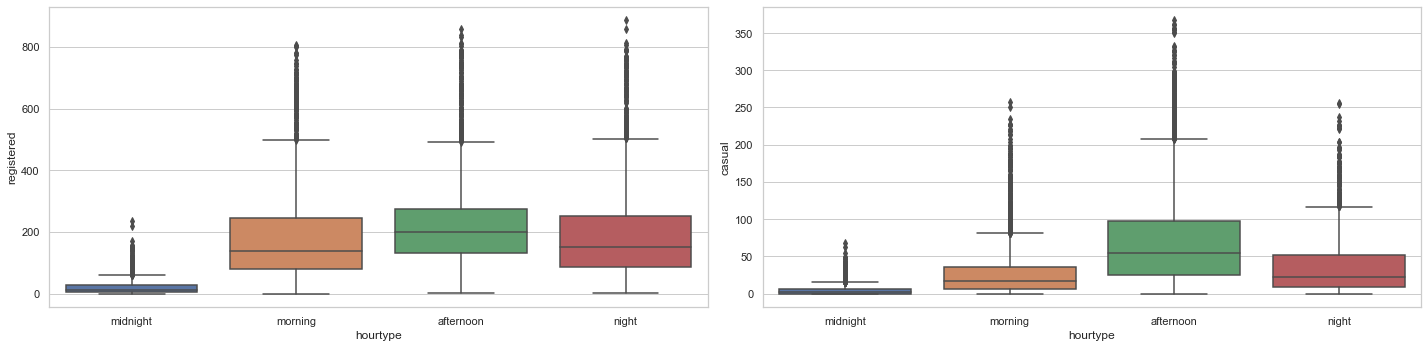

In [198]:
fig, axes = plt.subplots(1,2, figsize=(20,5))

sns.boxplot(x='hourtype', y='registered', data=data, ax=axes[0])

sns.boxplot(x='hourtype', y='casual', data=data, ax=axes[1])

plt.tight_layout()

- **HOURTYPE**: **casual** users tend to rent more during the afternoon as compared to other times

## Data Preprocessing

#### Encode labels

In [199]:
data_encode = pd.get_dummies(data, columns=['season','weather','daytype','hourtype'], drop_first=True)

#### Seperate data back to train and test datasets

In [200]:
# split data back into training and testing data sets.
train_encode = data_encode[data_encode['source']=='train']

unseen_test_encode = data_encode[data_encode['source']=='test']

In [201]:
unseen_test_encode = unseen_test_encode.drop(['casual','registered','count','source'], axis=1)

In [202]:
# select features
X = train_encode.drop(['datetime','holiday','workingday','atemp','count','month','day','hour','casual','registered','source'], axis=1)

y = train_encode['count']

# log transform to reduce the impact of outliers
y_log = np.log(y)

- **holiday**, **workingday** and **day** are replaced by **daytype**
- **season** is almost similar to **month**
- **atemp** has almost similar relationship as **temp**
- **hour** is replaced by **hourtype**
- **casual** and **registered** are not in the testing dataset.

In [203]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size=0.3, random_state=101)

## Model Selection 1

In [204]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

from sklearn import metrics

In [205]:
models = []

models.append(('LinReg', LinearRegression()))
models.append(('RidReg', Ridge()))
models.append(('LasReg', Lasso()))

In [206]:
# KFold use for regression
from sklearn.model_selection import KFold, cross_val_score

In [207]:
# using k-fold of 10 for cross validation
results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10, random_state=101, shuffle=True)
    cv_results = cross_val_score(model, X_train, np.exp(y_train), cv=kfold, scoring='neg_mean_squared_error')

    results.append(cv_results)
    names.append(name)
    print(f'{name}: {cv_results.mean()} ({cv_results.std()})')

LinReg: -16644.30548278759 (1262.5815688085129)
RidReg: -16644.219118158682 (1261.8746806753556)
LasReg: -16768.28451673901 (1214.8128222558814)


### Ridge Regression

In [208]:
rr = Ridge()

rr.fit(X_train, y_train)

# model coefficients
rr.coef_

array([ 4.69905366e-02, -6.73759021e-03, -2.25063799e-03,  4.52007074e-01,
        3.04166477e-01,  1.85276774e-01,  5.79528168e-01,  1.02984934e-02,
       -4.29805927e-01,  0.00000000e+00,  2.54054560e-02,  1.22781983e-01,
       -2.59362454e+00, -2.65928223e-01, -2.02371952e-01])

train score: 0.713216098203866
test score: 0.7151182849500374


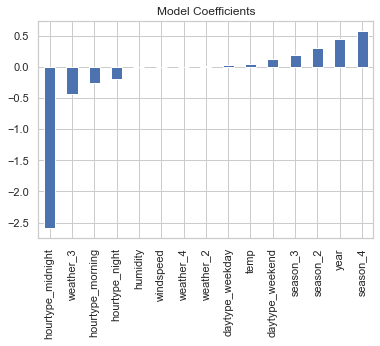

In [209]:
coef1 = pd.Series(rr.coef_, X.columns).sort_values()
coef1.plot(kind='bar', title='Model Coefficients')

print(f'train score: {rr.score(X_train, y_train)}')
print(f'test score: {rr.score(X_test, y_test)}')

Text(0, 0.5, 'Predicted Y')

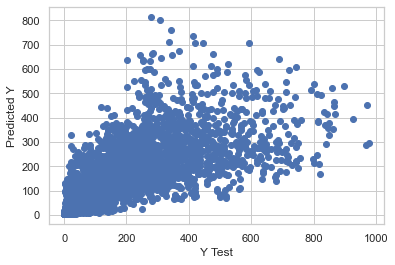

In [210]:
pred = rr.predict(X_test)

# inverse log back
plt.scatter(np.exp(y_test), np.exp(pred))
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

MAE: 82.78024892172223
MSE: 16965.086535032737
RMSE: 130.25009226496823
RMSLE: 0.7481958047078996


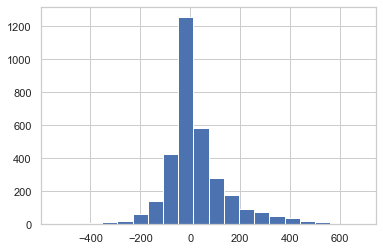

In [211]:
print('MAE:', metrics.mean_absolute_error(np.exp(y_test), np.exp(pred)))
print('MSE:', metrics.mean_squared_error(np.exp(y_test), np.exp(pred)))
print('RMSE:', np.sqrt(metrics.mean_squared_error(np.exp(y_test), np.exp(pred))))

print('RMSLE:', np.sqrt(metrics.mean_squared_log_error(np.exp(y_test), np.exp(pred))))

plt.hist(np.exp(y_test)-np.exp(pred), bins=20)
plt.show()

#### Parameter tuning

In [212]:
from sklearn.model_selection import GridSearchCV

In [213]:
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10]}

kfold = KFold(n_splits=10, random_state=101, shuffle=True)

In [214]:
grid_search = GridSearchCV(Ridge(), param_grid, cv=kfold)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=101, shuffle=True),
             estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10]})

In [215]:
best_param = grid_search.best_params_

best_score = grid_search.best_score_

print(f'best alpha: {best_param}')
print(f'best train score: {best_score}')

best alpha: {'alpha': 1}
best train score: 0.7109127114527614


### Lasso

In [216]:
las = Lasso()

las.fit(X_train, y_train)

# model coefficients
las.coef_

array([ 0.0517935 , -0.02131966,  0.        ,  0.        , -0.        ,
       -0.        ,  0.        ,  0.        , -0.        ,  0.        ,
       -0.        ,  0.        , -0.        ,  0.        ,  0.        ])

train score: 0.22443233147527175
test score: 0.22407554707181276


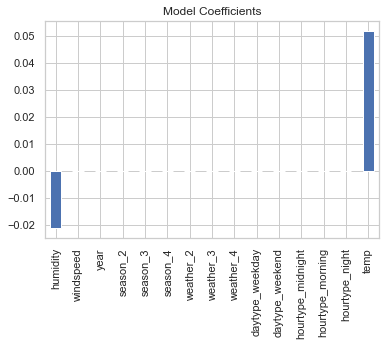

In [217]:
coef2 = pd.Series(las.coef_, X.columns).sort_values()
coef2.plot(kind='bar', title='Model Coefficients')

print(f'train score: {las.score(X_train, y_train)}')
print(f'test score: {las.score(X_test, y_test)}')

Text(0, 0.5, 'Predicted Y')

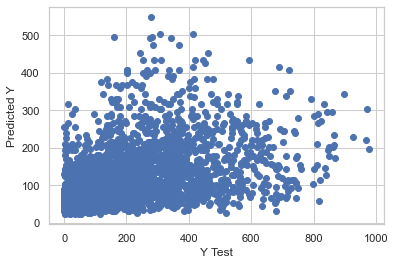

In [218]:
pred = las.predict(X_test)

# inverse log back
plt.scatter(np.exp(y_test), np.exp(pred))
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

MAE: 119.28497052213282
MSE: 31019.702418855715
RMSE: 176.12411083907767
RMSLE: 1.2392684433111036


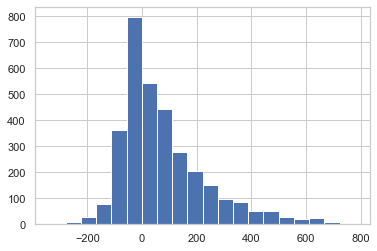

In [219]:
print('MAE:', metrics.mean_absolute_error(np.exp(y_test), np.exp(pred)))
print('MSE:', metrics.mean_squared_error(np.exp(y_test), np.exp(pred)))
print('RMSE:', np.sqrt(metrics.mean_squared_error(np.exp(y_test), np.exp(pred))))

print('RMSLE:', np.sqrt(metrics.mean_squared_log_error(np.exp(y_test), np.exp(pred))))

plt.hist(np.exp(y_test)-np.exp(pred), bins=20)
plt.show()

#### Parameter tuning

In [220]:
param_grid = {'alpha': [1, 0.01, 0.001, 0.0001]}

In [221]:
grid_search = GridSearchCV(Lasso(max_iter=100000), param_grid, cv=kfold)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=101, shuffle=True),
             estimator=Lasso(max_iter=100000),
             param_grid={'alpha': [1, 0.01, 0.001, 0.0001]})

In [222]:
best_param = grid_search.best_params_

best_score = grid_search.best_score_

print(f'best alpha: {best_param}')
print(f'best train score: {best_score}')

best alpha: {'alpha': 0.0001}
best train score: 0.7109153703415235


### Compare

In [223]:
models = []

models.append(('RidReg', Ridge(alpha=1)))
models.append(('LasReg', Lasso(alpha=0.0001)))

In [224]:
results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10, random_state=101, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_log_error')
    
    cv_results = np.sqrt(np.exp(cv_results))

    results.append(cv_results)
    names.append(name)
    print(f'{name}: {cv_results.mean()} ({cv_results.std()})')

RidReg: 0.9774081305153723 (0.0018031633124542012)
LasReg: 0.9774120195456864 (0.0018012776768842084)


In [237]:
ridreg = Ridge(alpha=1)

ridreg.fit(X_train, y_train)

pred_rid = las.predict(X_test)

In [238]:
mae = metrics.mean_absolute_error(np.exp(y_test), np.exp(pred_rid))
mse = metrics.mean_squared_error(np.exp(y_test), np.exp(pred_rid))
rmse = np.sqrt(metrics.mean_squared_error(np.exp(y_test), np.exp(pred_rid)))
rmsle = np.sqrt(metrics.mean_squared_log_error(np.exp(y_test), np.exp(pred_rid)))

In [240]:
ridreg_score = [mae, mse, rmse, rmsle]

## Model Selection 2

In [241]:
from sklearn.preprocessing import LabelEncoder

In [242]:
le = LabelEncoder()

data['daytype'] = le.fit_transform(data['daytype'])

data['hourtype'] = le.fit_transform(data['hourtype'])

In [243]:
# split data back into training and testing data sets.
train = data[data['source']=='train']

unseen_test = data[data['source']=='test']

In [244]:
unseen_test = unseen_test.drop(['datetime','holiday','workingday','atemp','count','month','day','hour','casual','registered','source'], axis=1)

In [245]:
# select features
X = train.drop(['datetime','holiday','workingday','atemp','count','month','day','hour','casual','registered','source'], axis=1)

y = train['count']

# log transform to reduce impact from outliers, eventhough tree based models are less effected
y_log = np.log(y)

In [246]:
X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size=0.3, random_state=101)

In [247]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [248]:
models = []

models.append(('DTR', DecisionTreeRegressor(random_state=101)))
models.append(('RFR', RandomForestRegressor(random_state=101)))

In [249]:
results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10, random_state=101, shuffle=True)
    cv_results = cross_val_score(model, X_train, np.exp(y_train), cv=kfold, scoring='neg_mean_squared_error')

    results.append(cv_results)
    names.append(name)
    print(f'{name}: {cv_results.mean()} ({cv_results.std()})')

DTR: -23695.063805956546 (2037.4694943149884)
RFR: -13682.956298936257 (1203.1757787281258)


### Random Forest
#### Parameter Tuning

In [250]:
# find max_features sqrt(8) is 3
param_grid = {'max_features': [n for n in range(1,4)]}

In [251]:
grid_search = GridSearchCV(RandomForestRegressor(random_state=101), param_grid=param_grid, cv=kfold)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=101, shuffle=True),
             estimator=RandomForestRegressor(random_state=101),
             param_grid={'max_features': [1, 2, 3]})

In [252]:
grid_search.best_params_

{'max_features': 3}

In [253]:
grid_search.best_score_

0.7512912899892638

In [254]:
cv_results = cross_val_score(RandomForestRegressor(random_state=101, max_features=3), X_train, np.exp(y_train), 
                             cv=kfold, scoring='neg_mean_squared_error')

print(f'RMSE: {cv_results.mean()} ({cv_results.std()})')

RMSE: -13188.447104651394 (1230.0662209624074)


In [255]:
rr = RandomForestRegressor(max_features=3)

rr.fit(X_train, y_train)

RandomForestRegressor(max_features=3)

Text(0, 0.5, 'Predicted Y')

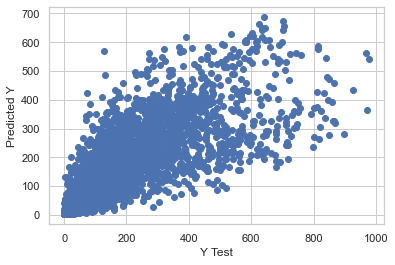

In [274]:
pred_rfr = rr.predict(X_test)

# inverse log back
plt.scatter(np.exp(y_test), np.exp(pred_rfr))
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

MAE: 70.49689927524155
MSE: 13050.703512122807
RMSE: 114.2396757353714
RMSLE: 0.6815695050883833


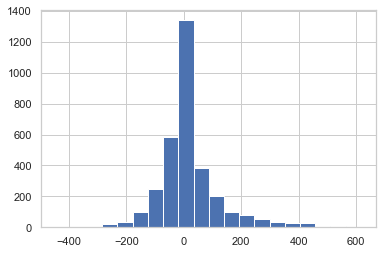

In [275]:
print('MAE:', metrics.mean_absolute_error(np.exp(y_test), np.exp(pred_rfr)))
print('MSE:', metrics.mean_squared_error(np.exp(y_test), np.exp(pred_rfr)))
print('RMSE:', np.sqrt(metrics.mean_squared_error(np.exp(y_test), np.exp(pred_rfr))))

print('RMSLE:', np.sqrt(metrics.mean_squared_log_error(np.exp(y_test), np.exp(pred_rfr))))

plt.hist(np.exp(y_test)-np.exp(pred_rfr), bins=20)
plt.show()

## Model 3: XGBoost

In [258]:
import xgboost as xgb

In [259]:
data_dmatrix = xgb.DMatrix(data=X, label=y_log)

In [260]:
param_grid = {'colsample_bytree': [0.1, 0.2, 0.3, 0.4, 0.5], 
              'learning_rate': [0.1, 0.01, 0.001], 
              'max_depth': [3,5,10,15,20], 
              'alpha': [1,10,100]}

kfold = KFold(n_splits=5, random_state=101, shuffle=True)

In [261]:
grid_search = GridSearchCV(xgb.XGBRegressor(objective='reg:squarederror'), param_grid=param_grid, cv=kfold)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=101, shuffle=True),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                   

In [262]:
grid_search.best_params_

{'alpha': 1, 'colsample_bytree': 0.5, 'learning_rate': 0.1, 'max_depth': 5}

In [263]:
grid_search.best_score_

0.7637245688453136

In [264]:
params = {'objective':'reg:squarederror', 
          'colsample_bytree': 0.5, 
          'learning_rate': 0.1, 
          'max_depth': 5, 
          'alpha': 1}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, 
                    nfold=5, num_boost_round=1000, early_stopping_rounds=10, 
                    metrics='rmse', as_pandas=True, seed=101)

In [265]:
cv_results.tail(1)

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
205,0.637855,0.001528,0.706127,0.005691


In [266]:
XGReg = xgb.XGBRegressor(objective='reg:squarederror', 
                         colsample_bytree = 0.5, learning_rate = 0.1, 
                         max_depth = 5, alpha = 1, 
                         n_estimators = 205)

MAE: 71.17433775434885
MSE: 12976.296615409943
RMSE: 113.9135488667171
RMSLE: 0.6559817131577423


Text(0, 0.5, 'predict Y')

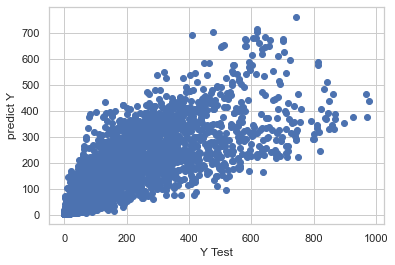

In [269]:
XGReg.fit(X_train, y_train)

pred_xgb = XGReg.predict(X_test)

print('MAE:', metrics.mean_absolute_error(np.exp(y_test), np.exp(pred_xgb)))
print('MSE:', metrics.mean_squared_error(np.exp(y_test), np.exp(pred_xgb)))
print('RMSE:', np.sqrt(metrics.mean_squared_error(np.exp(y_test), np.exp(pred_xgb))))

print('RMSLE:', np.sqrt(metrics.mean_squared_log_error(np.exp(y_test), np.exp(pred_xgb))))

plt.scatter(np.exp(y_test), np.exp(pred_xgb))
plt.xlabel('Y Test')
plt.ylabel('predict Y')

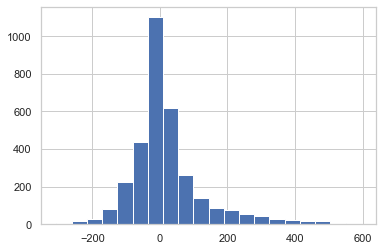

In [271]:
plt.hist(np.exp(y_test)-np.exp(pred_xgb), bins=20)
plt.show()

## Models Summary

In [286]:
score = []
for predict in [pred_rfr, pred_xgb]:
    mae = metrics.mean_absolute_error(np.exp(y_test), np.exp(predict))
    mse = metrics.mean_squared_error(np.exp(y_test), np.exp(predict))
    rmse = np.sqrt(metrics.mean_squared_error(np.exp(y_test), np.exp(predict)))
    rmsle = np.sqrt(metrics.mean_squared_log_error(np.exp(y_test), np.exp(predict)))
    
    scores = [mae, mse, rmse, rmsle]
    
    score.append(scores)
    
rfr_score = score[0]

xgb_score = score[1]

In [295]:
model_score = pd.DataFrame({'Metric':['MAE','MSE','RMSE','RMSLE'], 
                            'RidReg': ridreg_score,
                            'RFR': rfr_score,
                            'XGB': xgb_score})

model_score

,Metric,RidReg,RFR,XGB
0,MAE,82.773748,70.496899,71.174338
1,MSE,16963.013225,13050.703512,12976.296615
2,RMSE,130.242133,114.239676,113.913549
3,RMSLE,0.748210,0.681570,0.655982
